# Convergence Error with Degree in the money

In [5]:
options(scipen = 999)
source("Functions.R") # Import the functions from the Functions.R file
library(RColorBrewer)
library(scatterplot3d)
library(viridis)
library(plotly)

In [7]:
# Fixed parameters 
M = 50 # Number of time steps 
r = 0.005290473
S0 = 931.8 
sigma = 0.01026789
N = 1000 # Number of paths

In [13]:
list_of_strike <- c(931.8,935,940,945,950,960,970,980)

In [14]:
df <- data.frame()
for (i in 1:length(list_of_strike)) {
  K <- list_of_strike[i]
  
  binomial_value <- binomial_tree_american_put(K = K, M = 1000, r = r, S0 = 931.8, T = 1, sigma = sigma)
  
  price_mc <- price_american_put_longstaff_schwartz_MC(
    K = K,
    M = M,
    N = N,
    r = 0.005290473,
    S0 = 931.8,
    sigma = 0.01026789,
    polynomial = Y ~ X + I(X^2)
  )
  
  relative_error <- abs((binomial_value - price_mc) / binomial_value) * 100
  
  df <- rbind(df, data.frame(K = K, S0 = 931.8, binomial = binomial_value, MC = price_mc, error = relative_error))
}


In [15]:
df

K,S0,binomial,MC,error
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
931.8,931.8,2.323929,1.111100,52.1887400
935.0,931.8,3.978924,3.196879,19.6547075
940.0,931.8,8.200000,8.150696,0.6012635
945.0,931.8,13.200000,13.123296,0.5810922
950.0,931.8,18.200000,18.009741,1.0453780
960.0,931.8,28.200000,27.937269,0.9316705
970.0,931.8,38.200000,37.952713,0.6473469
980.0,931.8,48.200000,47.897656,0.6272692


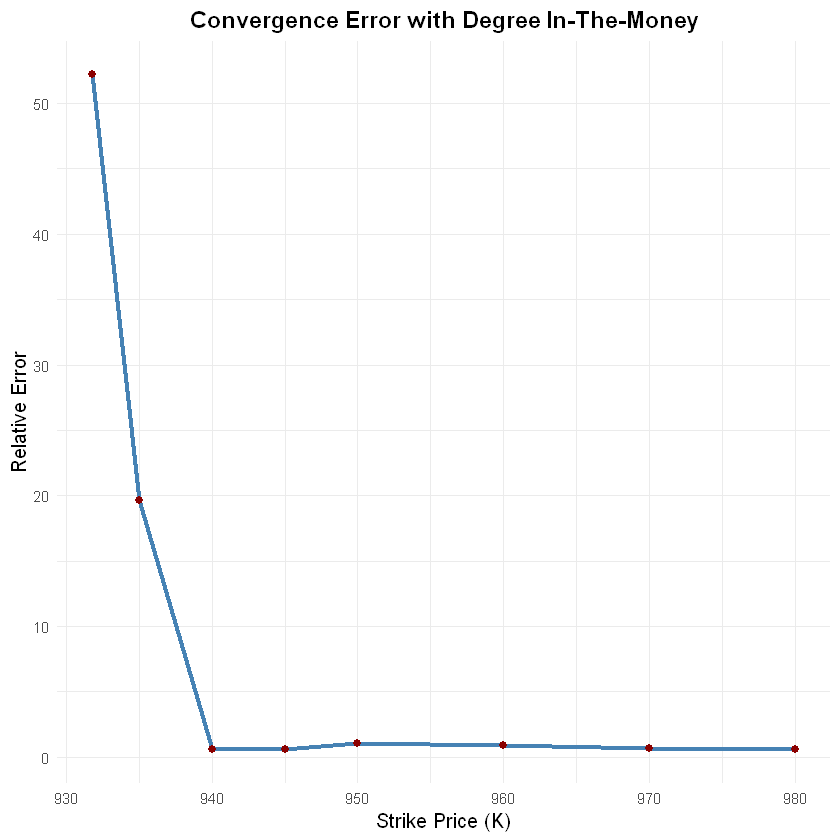

In [18]:
ggplot(df, aes(x = K, y = error)) +
  geom_line(color = "steelblue", size = 1.2) +
  geom_point(color = "darkred", size = 2) +
  labs(
    title = "Convergence Error with Degree In-The-Money",
    x = "Strike Price (K)",
    y = "Relative Error"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
    axis.title = element_text(size = 12)
  )
